<a href="https://colab.research.google.com/github/VaishnaviKrishnamoorthy/Loan_prediction/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [231]:
df = pd.read_csv("https://raw.githubusercontent.com/VaishnaviKrishnamoorthy/Loan_prediction/main/train_u6lujuX_CVtuZ9i%20(1).csv")

In [232]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [233]:
print("The Original dataset contain number of rows {} and number of columns {}".format(df.shape[0],df.shape[1]))

The Original dataset contain number of rows 614 and number of columns 13


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [235]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


# **Target Column**

In [236]:
target_count = df['Loan_Status'].value_counts()
print('Class No:', target_count[0])
print('Class yes:', target_count[1])

Class No: 422
Class yes: 192


Class 0: 422
Class 1: 192
Proportion of class 0 is  68.73 %
Proportion of class 1 is  31.27 %


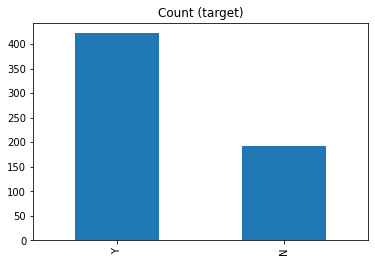

In [237]:
target_count = df ['Loan_Status'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
print('Proportion of class 1 is ', round(target_count[1] * 100 / (target_count[0] + target_count[1]), 2),'%')
target_count.plot(kind='bar', title='Count (target)');

# **This is a Imbalanced dataset. where 68 percent of data belongs to one class. so we need to balance this.**

# **Data Cleaning**

In [238]:
#checking duplicates 
df.duplicated().sum()

0

In [239]:
#checking for null value
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# **For Categorical data Filling Nan value with mode**

In [240]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0]).astype("int64")

In [241]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# **For numeric data filling nan value based on outliers**

**Have more outlier so we need to use Median to fill Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


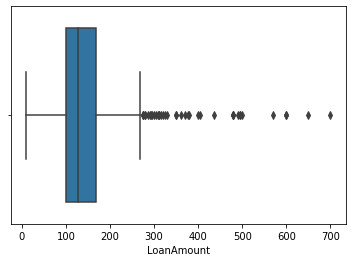

In [242]:
sns.boxplot(df['LoanAmount'])

In [243]:
median_loan_amount = df['LoanAmount'].median()
df['LoanAmount'].fillna((median_loan_amount), inplace=True)

**Have more outlier so we need to use Median to fill Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


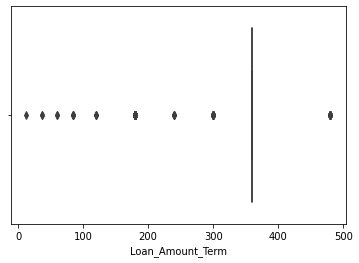

In [244]:
sns.boxplot(df['Loan_Amount_Term'])

In [245]:
median_loan = df['Loan_Amount_Term'].median()
df['Loan_Amount_Term'].fillna((median_loan), inplace=True)

# **Droping Unwanted columns**

**Unique variable cannot used as feature**

In [246]:
df = df.drop(['Loan_ID'],axis=1)

# **EDA**

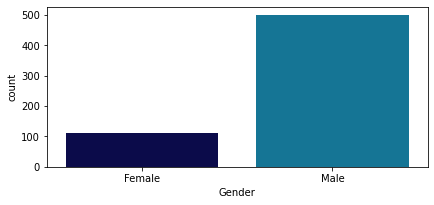

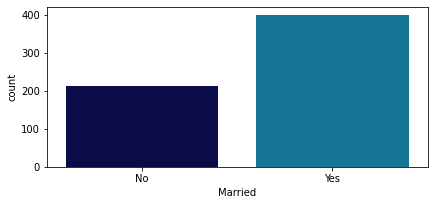

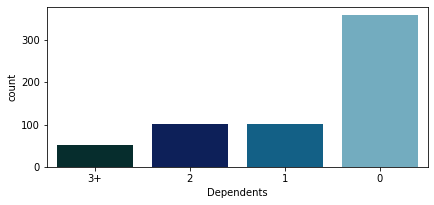

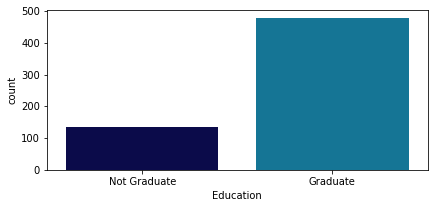

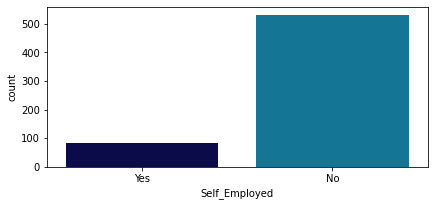

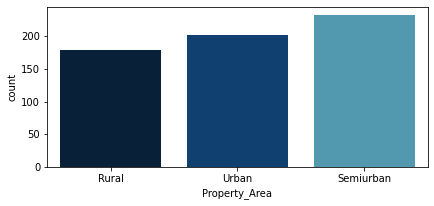

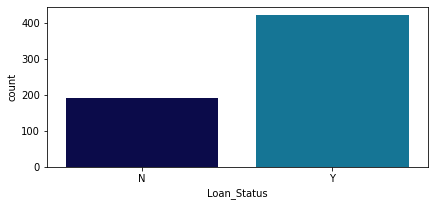

In [247]:
categorical_columns = df.select_dtypes('object').columns.to_list()
for column in categorical_columns:
    plt.figure(figsize=(15,10))
    plt.subplot(3,2,1)
    sns.countplot(x=df[column],order=df[column].value_counts().index[::-1],palette="ocean")
    plt.show()

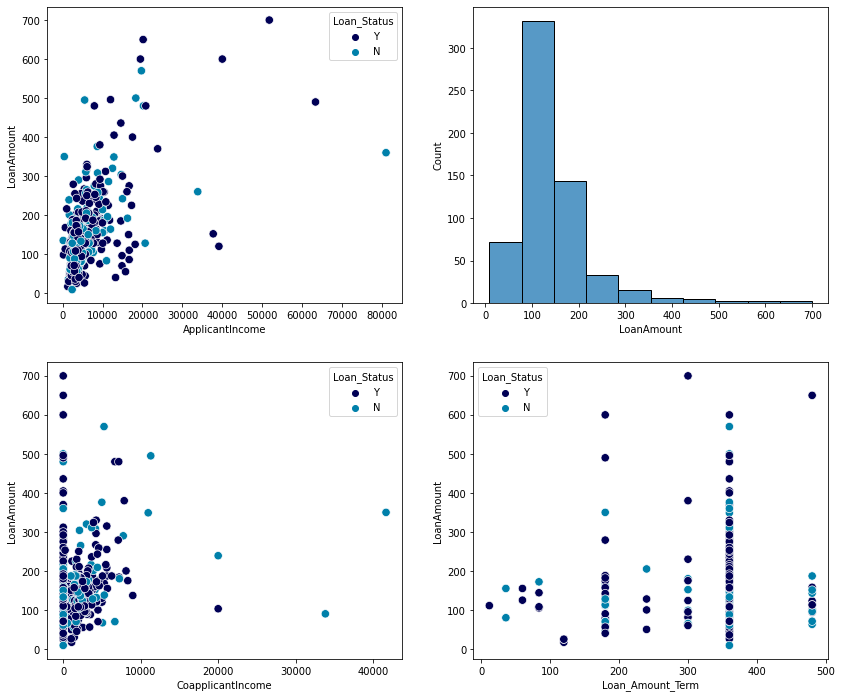

In [248]:
fig, ax = plt.subplots(2,2, figsize=(14,12))

sns.scatterplot(data=df,x="ApplicantIncome", y="LoanAmount",s=70, hue="Loan_Status", palette='ocean',ax=ax[0,0])
sns.histplot(df, x=df['LoanAmount'], bins=10, ax=ax[0,1])
sns.scatterplot(data=df,x='CoapplicantIncome', y='LoanAmount',s=70, hue='Loan_Status',palette='ocean', ax=ax[1,0])
sns.scatterplot(data=df,x='Loan_Amount_Term', y='LoanAmount', s=70, hue='Loan_Status',palette='ocean', ax=ax[1,1])

plt.show()

# **Encoding**

In [249]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Married'] = df['Married'].map({'No':0, 'Yes':1})
df['Dependents'] = df['Dependents'].map({'0':3, '1':2, '2':1, '3+':0})
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1})
df['Property_Area'] = df['Property_Area'].map({'Urban':1, 'Rural':0, 'Semiurban':2})
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

In [250]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
dtype: object

In [251]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# **Data preparation and splitting**

In [252]:
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']].values
y = df['Loan_Status'].values

In [253]:
original_feature = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [254]:
print(f"Independent features has {X.shape[0]} rows and {X.shape[1]} columns")
print(f"Dependent features has {y.shape[0]} rows and 1 column")

Independent features has 614 rows and 11 columns
Dependent features has 614 rows and 1 column


# **Splitting Data**

In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [256]:
print("The shape of X train:", X_train.shape)
print("The shape of X test:", X_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of X train: (429, 11)
The shape of X test: (185, 11)
The shape of y train: (429,)
The shape of y test: (185,)


# **Scaling the data**

In [257]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Balancing the data**

In [258]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Over-sampling followed by under-sampling**

Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [259]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train_scaled, y_train)

#**Implemeting Machine Learning Algorithm in the Balanced data**

# **Logistic regression**

In [260]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_smt,y_smt)
y_pred=lr.predict(X_test_scaled)

In [261]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head()

,Actual,Predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


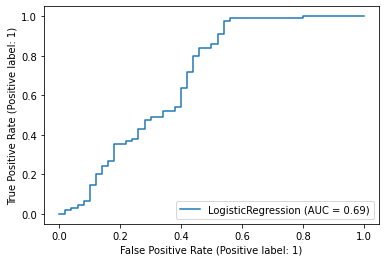

In [262]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix,f1_score
plot_roc_curve(lr, X_test_scaled, y_test)

# **KNN Algoritm**

In [263]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt) 
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled, y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))
  # Using cross validation finding the best k(hyper parameter) value

K value  :  1  train score :  0.7668997668997669  score :  0.6945182724252492
K value  :  2  train score :  0.7342657342657343  score :  0.6478959025470653
K value  :  3  train score :  0.7668997668997669  score :  0.7739202657807309
K value  :  4  train score :  0.7715617715617715  score :  0.7367109634551494
K value  :  5  train score :  0.7738927738927739  score :  0.7739202657807309
K value  :  6  train score :  0.7552447552447552  score :  0.7389811738648948
K value  :  7  train score :  0.7622377622377622  score :  0.7879291251384274
K value  :  8  train score :  0.7622377622377622  score :  0.7669435215946844
K value  :  9  train score :  0.7599067599067599  score :  0.7973421926910298
K value  :  10  train score :  0.7552447552447552  score :  0.7926910299003321
K value  :  20  train score :  0.7738927738927739  score :  0.792580287929125
K value  :  50  train score :  0.7575757575757576  score :  0.7810077519379844


In [264]:
knn = KNeighborsClassifier(20) 
knn.fit(X_smt,y_smt)
y_pred=knn.predict(X_test_scaled)

In [265]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.head()

,Actual,Predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


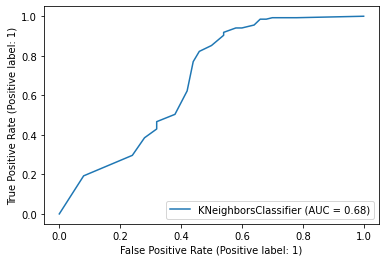

In [266]:
plot_roc_curve(knn, X_test_scaled, y_test)

# **Decission tree**

In [267]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
import numpy as np
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(X_smt, y_smt) 
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train_scaled)) 
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train_scaled, y_train, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7995337995337995  Cross val score :  0.7996124031007751
Depth  :  2  Training Accuracy :  0.7995337995337995  Cross val score :  0.7972868217054263
Depth  :  3  Training Accuracy :  0.7832167832167832  Cross val score :  0.7740310077519379
Depth  :  4  Training Accuracy :  0.7622377622377622  Cross val score :  0.7764119601328903
Depth  :  5  Training Accuracy :  0.7925407925407926  Cross val score :  0.757751937984496
Depth  :  6  Training Accuracy :  0.7972027972027972  Cross val score :  0.7578073089700996
Depth  :  7  Training Accuracy :  0.8065268065268065  Cross val score :  0.7368217054263566
Depth  :  8  Training Accuracy :  0.7995337995337995  Cross val score :  0.72281284606866
Depth  :  9  Training Accuracy :  0.7995337995337995  Cross val score :  0.7135105204872646
Depth  :  10  Training Accuracy :  0.7995337995337995  Cross val score :  0.7064784053156147
Depth  :  20  Training Accuracy :  0.7995337995337995  Cross val score :  0.685437

In [268]:
dt = DecisionTreeClassifier(max_depth=2) 
dt.fit(X_smt, y_smt)
y_pred = dt.predict(X_test_scaled)

In [269]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3.head()

,Actual,Predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


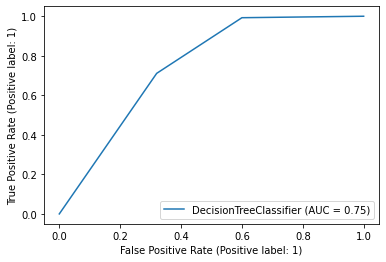

In [270]:
plot_roc_curve(dt, X_test_scaled, y_test)

# **Random forest**

In [271]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf.fit(X_smt,y_smt)
y_pred = rf.predict(X_test_scaled)

In [272]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df4.head()

,Actual,Predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


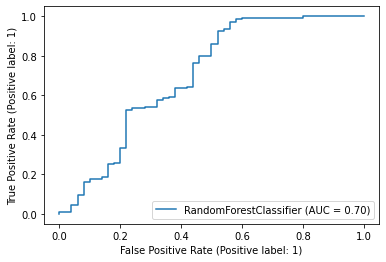

In [273]:
plot_roc_curve(rf, X_test_scaled, y_test)

# **XG boost**

In [274]:
import xgboost as xgb
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_smt,y_smt) #train the model
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.7832167832167832  Cross-Val score :  0.7996124031007751
Learning rate :  0.02  Train score :  0.7972027972027972  Cross-Val score :  0.7996124031007751
Learning rate :  0.03  Train score :  0.7995337995337995  Cross-Val score :  0.7996124031007751
Learning rate :  0.04  Train score :  0.7995337995337995  Cross-Val score :  0.7996124031007751
Learning rate :  0.05  Train score :  0.7972027972027972  Cross-Val score :  0.7949612403100774
Learning rate :  0.06  Train score :  0.7972027972027972  Cross-Val score :  0.7949612403100774
Learning rate :  0.07  Train score :  0.8018648018648019  Cross-Val score :  0.7926356589147285
Learning rate :  0.08  Train score :  0.8065268065268065  Cross-Val score :  0.7949612403100775
Learning rate :  0.09  Train score :  0.7972027972027972  Cross-Val score :  0.7879844961240309
Learning rate :  0.1  Train score :  0.8018648018648019  Cross-Val score :  0.7903100775193798
Learning rate :  0.11  Train score :  0.8

In [275]:
model = xgb.XGBClassifier(learning_rate = 0.02, n_estimators=100)
model.fit(X_smt,y_smt) 
y_pred = model.predict(X_test_scaled)

In [276]:
df5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df5.head()

,Actual,Predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


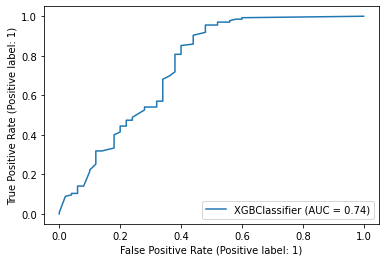

In [277]:
plot_roc_curve(model, X_test_scaled, y_test)

# **We are going to Use XG Booster because that gives us a good AUROC Score.**

# **Feature Importance**

In [278]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Credit_History       Importance: 0.53
Variable: LoanAmount           Importance: 0.07
Variable: Married              Importance: 0.06
Variable: Self_Employed        Importance: 0.06
Variable: ApplicantIncome      Importance: 0.06
Variable: CoapplicantIncome    Importance: 0.06
Variable: Loan_Amount_Term     Importance: 0.06
Variable: Property_Area        Importance: 0.06
Variable: Dependents           Importance: 0.02
Variable: Gender               Importance: 0.01
Variable: Education            Importance: 0.01


# **Importing the Best model using pickle package**

In [279]:
import pickle
filename = "Loan_model"
pickle.dump(model,open(filename,'wb'))

In [280]:
loaded_model = pickle.load(open(filename,'rb'))
pred = loaded_model.predict(X_test)